In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df_raw = pd.read_csv('1000_companies_cleaned.csv')
df_raw.drop(df_raw.columns[0], axis=1, inplace=True)
df_raw.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,153441.51,101145.55,407934.54,191050.39
2,144372.41,118671.85,383199.62,182901.99
3,131876.90,99814.71,362861.36,156991.12
4,134615.46,147198.87,127716.82,156122.51


###Drop N/A

In [ ]:
for column_name in df_raw.columns:
    column = df_raw[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  R&D Spend  is :  2
Count of zeros in column  Administration  is :  0
Count of zeros in column  Marketing Spend  is :  1
Count of zeros in column  Profit  is :  0


In [ ]:
cols = df_raw.columns
df_raw[cols] = df_raw[cols].replace({'0':np.nan, 0:np.nan})

In [ ]:
df_raw.isna().sum()

R&D Spend          2
Administration     0
Marketing Spend    1
Profit             0
dtype: int64

In [ ]:
df_raw = df_raw.dropna()

###Minmax Normalization

In [ ]:
df = df_raw.copy()
  
# minmax normalization 
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
print(df)

     R&D Spend  Administration  Marketing Spend    Profit
0     1.000000        0.785025         1.000000  1.000000
1     0.927546        0.038905         0.864115  0.991515
2     0.872364        0.404664         0.811474  0.934442
3     0.796334        0.011131         0.768190  0.752956
4     0.812997        1.000000         0.267755  0.746872
..         ...             ...              ...       ...
973   0.633571        0.557236         0.574014  0.625836
974   0.278662        0.377463         0.334494  0.276816
975   0.585393        0.532833         0.541500  0.578457
976   0.323305        0.400076         0.364622  0.320718
977   0.815154        0.649214         0.696561  0.804406

[976 rows x 4 columns]


###Data Splitting

In [ ]:
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Profit')
test_labels = test_features.pop('Profit')

###Data Modeling

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)                        
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    metrics = ['mae']
)

history = model.fit(
    train_features, 
    train_labels, 
    validation_split=0.2,
    epochs=25)

Epoch 1/25
20/20 [==============================] - 1s 12ms/step - loss: 0.8456 - mae: 0.8456 - val_loss: 0.1134 - val_mae: 0.1134
Epoch 2/25
20/20 [==============================] - 0s 4ms/step - loss: 0.0851 - mae: 0.0851 - val_loss: 0.0776 - val_mae: 0.0776
Epoch 3/25
20/20 [==============================] - 0s 3ms/step - loss: 0.0539 - mae: 0.0539 - val_loss: 0.0245 - val_mae: 0.0245
Epoch 4/25
20/20 [==============================] - 0s 3ms/step - loss: 0.0466 - mae: 0.0466 - val_loss: 0.0690 - val_mae: 0.0690
Epoch 5/25
20/20 [==============================] - 0s 3ms/step - loss: 0.0896 - mae: 0.0896 - val_loss: 0.0268 - val_mae: 0.0268
Epoch 6/25
20/20 [==============================] - 0s 4ms/step - loss: 0.0371 - mae: 0.0371 - val_loss: 0.0158 - val_mae: 0.0158
Epoch 7/25
20/20 [==============================] - 0s 4ms/step - loss: 0.0306 - mae: 0.0306 - val_loss: 0.0210 - val_mae: 0.0210
Epoch 8/25
20/20 [==============================] - 0s 3ms/step - loss: 0.0320 - mae: 0.0

###Data Testing

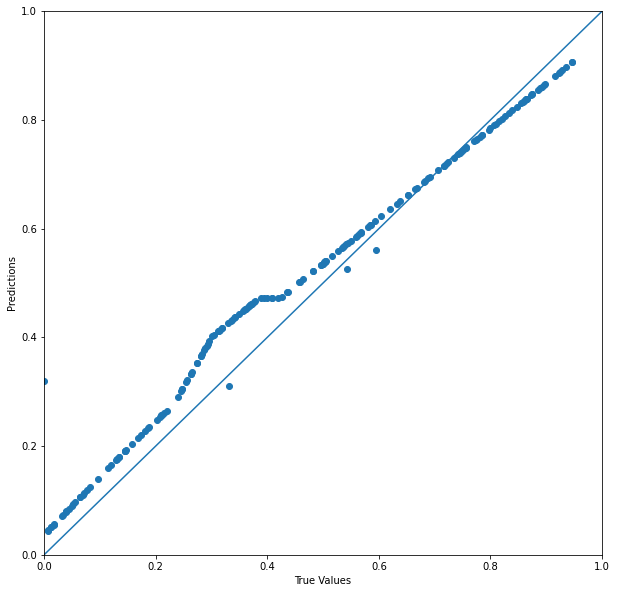

In [ ]:
test_pred = model.predict(test_features).flatten()

plt.figure(figsize=(10, 10))

plt.scatter(test_labels, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
model.predict([1500000, 2000000, 500000])

array([[926518.56]], dtype=float32)